In [1]:
import numpy as np

Crystal 1: a 1-D crystal with unit cell a=100 Angstroms, containing a polymer chain of 99 atoms spaced 1 Angstrom apart.  There is a 1 Angstom gap between polymer molecules. Sample this unit cell on a grid of 1600 points.

In [2]:
from matplotlib import pyplot as plt
from math import pi,sin
class crystal:
  def __init__(self):
    self.LENGTH_PER_CELL = 100
    self.POINTS_PER_CELL = 1600
    self.PERIODS_PER_MOLECULE = 99
    self.LENGTH_PER_MOLECULE = 99
  def compute(self):
    self.points_per_period = float(self.POINTS_PER_CELL)*self.LENGTH_PER_MOLECULE/ \
                             self.LENGTH_PER_CELL/self.PERIODS_PER_MOLECULE
    self.length_per_point = float(self.LENGTH_PER_CELL)/float(self.POINTS_PER_CELL)
    print self.points_per_period, self.length_per_point
    self.xvals = []
    self.yvals = [0.]*self.POINTS_PER_CELL
    for x in range(self.POINTS_PER_CELL):
      matter_wave_phase = x/self.points_per_period # phase in number of periods
      xc = matter_wave_phase * pi # phase in radians
      if matter_wave_phase < self.PERIODS_PER_MOLECULE:
        self.yvals[x] = ( (sin(xc))**2)
      length_coord = x * self.length_per_point
      self.xvals.append(length_coord)
C1 = crystal()
C1.compute()
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(C1.xvals,C1.yvals, "r-")
plt.show()

16.0 0.0625


<Figure size 1400x100 with 1 Axes>

Crystal 2: The molecule is the same.  But the unit cell is expanded to 101 Angstroms.

15.8415841584 0.063125


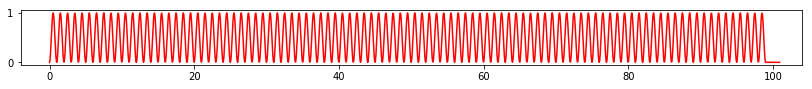

In [3]:
C2 = crystal()
C2.LENGTH_PER_CELL = 101
C2.compute()
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(C2.xvals,C2.yvals, "r-")
plt.show()

In [4]:
real1 = np.array(C1.yvals)
real2 = np.array(C2.yvals)
rfft1 = np.fft.rfft(real1)
rfft2 = np.fft.rfft(real2)
rfft1sq = np.abs(rfft1) * np.abs(rfft1)
rfft2sq = np.abs(rfft2) * np.abs(rfft2)

The Fourier transform (diffraction pattern) of Crystal 1.  Note that the x-axis now gives the Miller index, labeled in discrete units.  The structure factors are plotted on a log axis.  Two important structure factors are H=0 (basically the number of electrons in the whole cell), and H=100, which encodes the repeating nature of the molecular envelope with the atomic repeat at 1/100 of the unit cell.  The other structure factors have small non-zero values that encode the size of the molecule (99 Angstroms long).

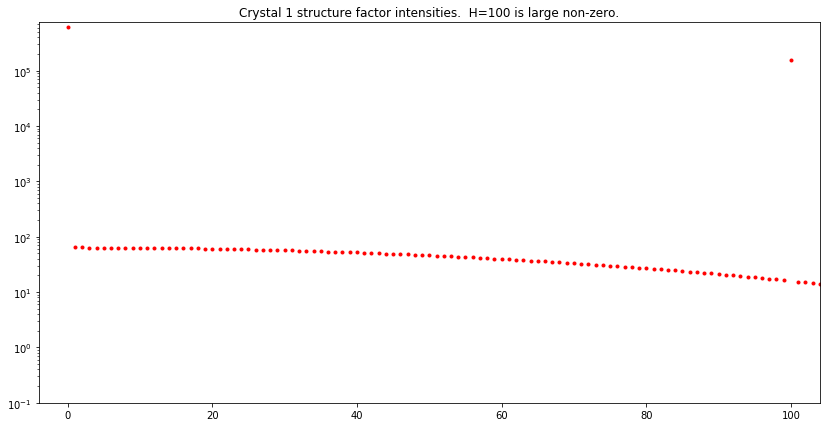

In [5]:
plt.figure(figsize=(14,7))
plt.semilogy(xrange(len(rfft1sq)),rfft1sq, "r.")
plt.xlim((-4,104))
plt.ylim((0.1,750000))
plt.title("Crystal 1 structure factor intensities.  H=100 is large non-zero.")
plt.show()

The essential difference with Crystal 2 is that the significantly large structure factor is at H=101, indicating that the atomic repeat is 1/101 of the cell length (still 1-Angstrom, as Crystal 1 and Crystal 2 have the same molecule). 

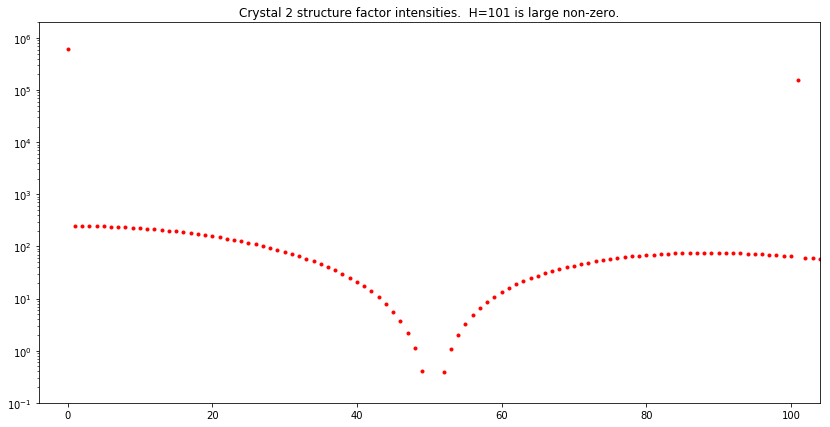

In [6]:
plt.figure(figsize=(14,7))
plt.semilogy(xrange(len(rfft2sq)),rfft2sq, "r.")
plt.xlim((-4,104))
plt.ylim((0.1,2000000))
plt.title("Crystal 2 structure factor intensities.  H=101 is large non-zero.")
plt.show()

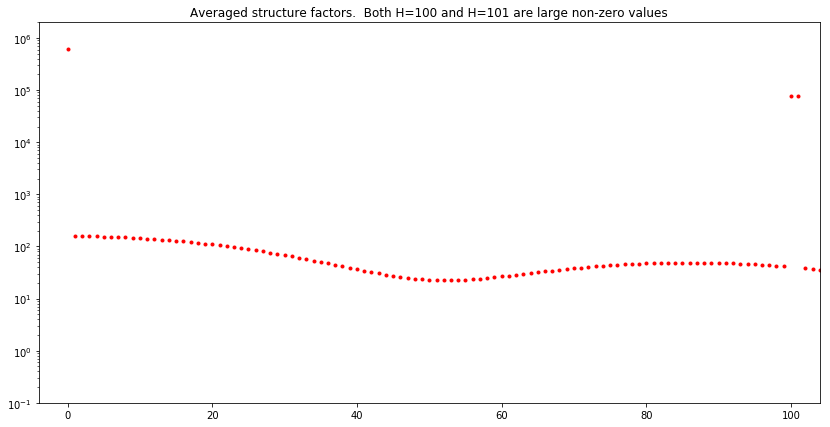

In [7]:
plt.figure(figsize=(14,7))
plt.semilogy(xrange(len(rfft2sq)),0.5 *(rfft1sq + rfft2sq), "r.")
plt.xlim((-4,104))
plt.ylim((0.1,2000000))
plt.title("Averaged structure factors.  Both H=100 and H=101 are large non-zero values")
plt.show()

The positive control.  Take the squared amplitudes from crystal 1 (standing in for Bragg spot intensities), along with phases from fft1, and re-synthesize the electron density with a reverse Fourier transform.

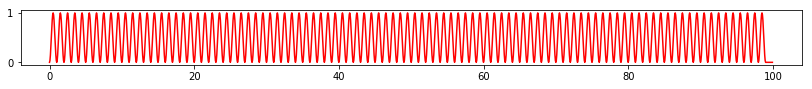

In [8]:
amplitudes = np.sqrt(rfft1sq)
phases = np.angle(rfft1)
coefficients = amplitudes * np.exp(phases*1j)
new_map = np.fft.irfft(coefficients)
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(C1.xvals,new_map, "r-")
plt.show()

The test.  Re-synthesize the electron density again using phases from fft1, but now using average intensities observed from both crystals.  The 1-Angstrom repeat is obliterated in the middle of the unit cell.

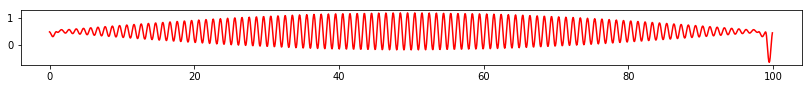

In [9]:
summed = 0.5*(rfft1sq + rfft2sq)
amplitudes2 = np.sqrt(summed)
coefficients2 = amplitudes2 * np.exp(phases*1j)
new_map = np.fft.irfft(coefficients2)
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(C1.xvals,new_map, "r-")
plt.show()